In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import math

/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# y = w * x + b 함수
def myfunc(x):
  y = math.cos(x) + math.sin(x) * math.sin(x)
  noise = random.random() * 0.1 # Noise
  return y + y*noise

In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 20          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xtrain = [random.random() * XVALUE for i in range(NUM_DATA)]
xtrain.sort()            # sorting

In [4]:
ytrain = [myfunc(x) for x in xtrain]
print('xtrain :',xtrain[:3])
print('ytrain :',ytrain[:3])

xtrain : [0.90654028473103, 1.447614558617526, 1.5634974643745299]
ytrain : [1.3541255592684864, 1.2065423768633563, 1.0541066248850615]


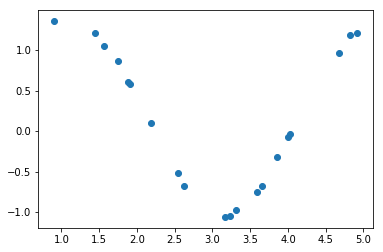

In [5]:
# actual data 산점도
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='actual')
plt.show()

In [6]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print('xlist.shape :',xtrain.shape)  # shape ==  (10,)
print('ylist.shape :',ytrain.shape)  # shape ==  (10,)

xlist.shape : (20,)
ylist.shape : (20,)


In [7]:
# tensor 에 맞추기 위해 reshape
xtrain = xtrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ytrain = ytrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xtrain.shape)
print('ylist.shape :', ytrain.shape)

xlist.shape : (20, 1)
ylist.shape : (20, 1)


In [8]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([1,1], -1, 1), name='weight')
B = tf.Variable(tf.random_normal([1], -1, 1), name='bias')
Y2 = tf.matmul(X, W) + B   # [1,1]행렬 x [1,1]행렬 + [1]
# activation 함수
# sigmoid(), tanh()
Y2 = tf.sigmoid(Y2)


In [9]:
# 손실 함수
cost_function = tf.reduce_mean(tf.square(Y2 - Y))
# 옵티마이저
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
training = optimizer.minimize(cost_function)

In [10]:
# loss list
history = []           # Record loss values for plot

In [11]:
# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
  res, cost  = sess.run([training, cost_function],
                        feed_dict={X: xtrain, Y:ytrain})
  if i % 10 == 0:
    y2, w, b = sess.run([Y2, W, B], feed_dict={X: xtrain, Y: ytrain})
    print('[%04d]' % i, 'LOSS', cost, 'W', w, 'bias', b)

    history.append(cost)

[0000] LOSS 0.69483316 W [[-0.516579]] bias [-1.1170714]
[0010] LOSS 0.66286516 W [[-0.76094484]] bias [-0.10449009]
[0020] LOSS 0.6213215 W [[-1.1110181]] bias [0.9457137]
[0030] LOSS 0.5794489 W [[-1.5138357]] bias [2.003914]
[0040] LOSS 0.54581964 W [[-1.917335]] bias [3.0032144]
[0050] LOSS 0.5222688 W [[-2.293315]] bias [3.8895724]
[0060] LOSS 0.5064993 W [[-2.6268675]] bias [4.647733]
[0070] LOSS 0.49582052 W [[-2.9171293]] bias [5.290355]
[0080] LOSS 0.48832455 W [[-3.1700675]] bias [5.8397846]
[0090] LOSS 0.48283738 W [[-3.3930929]] bias [6.3174415]
[0100] LOSS 0.47866043 W [[-3.5926936]] bias [6.7403016]
[0110] LOSS 0.47537392 W [[-3.7738845]] bias [7.120815]
[0120] LOSS 0.47271758 W [[-3.9403627]] bias [7.467877]
[0130] LOSS 0.47052383 W [[-4.0948195]] bias [7.787859]
[0140] LOSS 0.46868044 W [[-4.2392282]] bias [8.085405]
[0150] LOSS 0.4671093 W [[-4.3750625]] bias [8.363981]
[0160] LOSS 0.46575436 W [[-4.5034566]] bias [8.626242]
[0170] LOSS 0.46457434 W [[-4.6253123]] bias

In [12]:
## loss 값의 변화 그래프

No handles with labels found to put in legend.


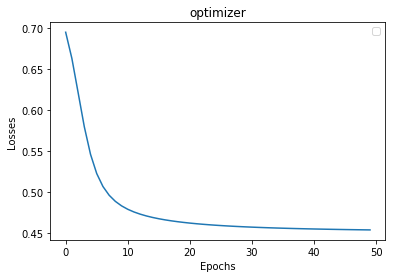

In [13]:
# Plot the accuracy and cost summaries
f, ax = plt.subplots()

ax.plot(history)    # GradientDescentOptimizer
ax.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

## 학습 데이터에 대한 정확도 확인 (학습 오차 확인)

In [14]:
y_from_nn = sess.run([Y2], feed_dict={X: xtrain})

for y_nn, y_real in zip(y_from_nn[0], ytrain):
    err = abs(y_nn[0] - y_real) / y_real * 100
    print('%.2f  %.2f 오차율 %.2f %%' % (y_nn[0], y_real, err))
    

1.00  1.35 오차율 26.20 %
0.97  1.21 오차율 19.65 %
0.93  1.05 오차율 11.41 %
0.80  0.86 오차율 7.38 %
0.61  0.61 오차율 0.33 %
0.55  0.58 오차율 4.50 %
0.15  0.10 오차율 57.86 %
0.01  -0.52 오차율 -102.78 %
0.01  -0.68 오차율 -101.23 %
0.00  -1.06 오차율 -100.02 %
0.00  -1.04 오차율 -100.01 %
0.00  -0.97 오차율 -100.01 %
0.00  -0.75 오차율 -100.00 %
0.00  -0.68 오차율 -100.00 %
0.00  -0.33 오차율 -100.00 %
0.00  -0.07 오차율 -100.00 %
0.00  -0.03 오차율 -100.00 %
0.00  0.97 오차율 100.00 %
0.00  1.19 오차율 100.00 %
0.00  1.21 오차율 100.00 %


## 테스트 데이터로 해보기

In [15]:
x_unseen = [random.random() * XVALUE for i in range(NUM_DATA)]
x_unseen = np.array(x_unseen).reshape((NUM_DATA, 1))

y_unseen = sess.run([Y2], feed_dict={X: x_unseen})

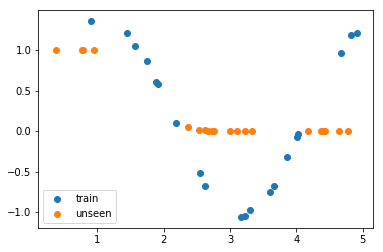

In [16]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='train')
ax.scatter(x_unseen, y_unseen, label='unseen')

ax.legend()
plt.show()